<a href="https://colab.research.google.com/github/RostislavB74/NN_HW9/blob/main/GoIT_HW_9_ok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install scikeras

In [68]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import keras
import time
import pickle
import itertools
%matplotlib inline
from keras import optimizers
from tensorflow import keras as K
from keras.optimizers import Adam, RMSprop, SGD
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import utils
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasClassifier, KerasRegressor
from keras.layers import Flatten, Dense
from tabulate import tabulate
from keras.callbacks import ReduceLROnPlateau

Параметри

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
num_classes = 10
num_features = 28*28

learning_rate = 0.0001
training_steps = 3000
batch_size = 512
display_step = 100

n_hidden_1 = 128
n_hidden_2 = 256
n_hidden_3 = 512
n_hidden_4 = 1024

In [7]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [8]:
x_train_1, x_test_1 = x_train / 255., x_test / 255.
y_train_1, y_test_1 = y_train, y_test

# Модель 1

3 шари + Дропаут 0,3

In [9]:
model_1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28,1)),
    keras.layers.Dense(n_hidden_1, activation='relu', name='1st_layer'),
    Dropout(0.3),
    keras.layers.Dense(n_hidden_2, activation='relu', name='2nd_layer'),
    Dropout(0.3),
    keras.layers.Dense(num_classes, activation = 'softmax', name = 'Hypothesis')
])

In [10]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 1st_layer (Dense)           (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 2nd_layer (Dense)           (None, 256)               33024     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 Hypothesis (Dense)          (None, 10)                2570      
                                                                 
Total params: 136074 (531.54 KB)
Trainable params: 13607

In [23]:
model_1.compile(
    optimizer=RMSprop(learning_rate=learning_rate),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [24]:
model_1.save('1_model')

# Модель 2

3 шари + Дропаут 0.1

In [13]:
model_2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(n_hidden_1, activation='relu', name='1st_layer'),
    Dropout(0.1),
    keras.layers.Dense(n_hidden_2, activation='relu', name='2nd_layer'),
    Dropout(0.1),
    keras.layers.Dense(n_hidden_3, activation='relu', name='3nd_layer'),
    Dropout(0.1),
    keras.layers.Dense(num_classes, activation = 'softmax', name = 'Hypothesis')
])

In [14]:
model_2.compile(
    optimizer=RMSprop(learning_rate=learning_rate),
    loss='binary_crossentropy',
    metrics=['accuracy']
)



In [15]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 1st_layer (Dense)           (None, 128)               100480    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 2nd_layer (Dense)           (None, 256)               33024     
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 3nd_layer (Dense)           (None, 512)               131584    
                                                                 
 dropout_4 (Dropout)         (None, 512)              

In [16]:
model_2.save('2_model')

# Модель 3

4 шари + дропаут 0.1

In [17]:
model_3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(n_hidden_1, activation='relu', name='1st_layer'),
    Dropout(0.1),
    keras.layers.Dense(n_hidden_2, activation='relu', name='2nd_layer'),
    Dropout(0.1),
    keras.layers.Dense(n_hidden_3, activation='relu', name='3nd_layer'),
    Dropout(0.1),
    keras.layers.Dense(n_hidden_4, activation='relu', name='4th_layer'),
    Dropout(0.1),
    keras.layers.Dense(num_classes, activation = 'softmax', name = 'Hypothesis')
])

In [18]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 1st_layer (Dense)           (None, 128)               100480    
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 2nd_layer (Dense)           (None, 256)               33024     
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 3nd_layer (Dense)           (None, 512)               131584    
                                                                 
 dropout_7 (Dropout)         (None, 512)              

In [19]:
model_3.compile(
    optimizer=RMSprop(learning_rate=learning_rate),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [20]:
model_3.save('3_model')

In [21]:
# Перетворення міток у форму one-hot encoding
y_train_1 = to_categorical(y_train_1)


# Тренування моделі 1

30 епох батч 512

In [26]:
model_t1= keras.models.load_model("1_model")
history = model_t1.fit(x_train_1, y_train_1, batch_size=512, epochs=30, validation_split=0.2, verbose=1)

loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

final_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]
final_accuracy = history.history['accuracy'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]

print("Final Loss:", final_loss)
print("Final Validation Loss:", final_val_loss)
print("Final Accuracy:", final_accuracy)
print("Final Validation Accuracy:", final_val_accuracy)

Epoch 1/30
94/94 [==============================] - 3s 22ms/step - loss: 0.3879 - accuracy: 0.2204 - val_loss: 0.2656 - val_accuracy: 0.6127
Epoch 2/30
94/94 [==============================] - 3s 28ms/step - loss: 0.2526 - accuracy: 0.4889 - val_loss: 0.1898 - val_accuracy: 0.6672
Epoch 3/30
94/94 [==============================] - 2s 25ms/step - loss: 0.2010 - accuracy: 0.5972 - val_loss: 0.1576 - val_accuracy: 0.6908
Epoch 4/30
94/94 [==============================] - 2s 16ms/step - loss: 0.1747 - accuracy: 0.6460 - val_loss: 0.1403 - val_accuracy: 0.7161
Epoch 5/30
94/94 [==============================] - 1s 15ms/step - loss: 0.1579 - accuracy: 0.6805 - val_loss: 0.1294 - val_accuracy: 0.7360
Epoch 6/30
94/94 [==============================] - 1s 15ms/step - loss: 0.1462 - accuracy: 0.7047 - val_loss: 0.1211 - val_accuracy: 0.7562
Epoch 7/30
94/94 [==============================] - 1s 15ms/step - loss: 0.1371 - accuracy: 0.7255 - val_loss: 0.1147 - val_accuracy: 0.7693
Epoch 8/30
94

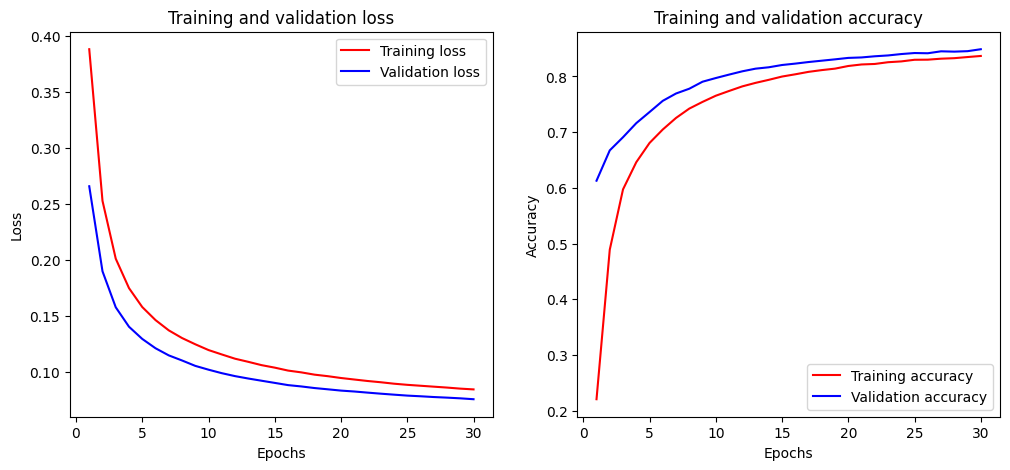

In [27]:
plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

50 епох батч 512

In [28]:
model_t1= keras.models.load_model("1_model")
history = model_t1.fit(x_train_1, y_train_1, batch_size=512, epochs=50, validation_split=0.2, verbose=1)

loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

final_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]
final_accuracy = history.history['accuracy'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]

print("Final Loss:", final_loss)
print("Final Validation Loss:", final_val_loss)
print("Final Accuracy:", final_accuracy)
print("Final Validation Accuracy:", final_val_accuracy)

Epoch 1/50
94/94 [==============================] - 3s 28ms/step - loss: 0.3882 - accuracy: 0.2168 - val_loss: 0.2653 - val_accuracy: 0.6211
Epoch 2/50
94/94 [==============================] - 1s 15ms/step - loss: 0.2522 - accuracy: 0.4894 - val_loss: 0.1893 - val_accuracy: 0.6648
Epoch 3/50
94/94 [==============================] - 2s 21ms/step - loss: 0.2009 - accuracy: 0.5988 - val_loss: 0.1574 - val_accuracy: 0.6878
Epoch 4/50
94/94 [==============================] - 2s 21ms/step - loss: 0.1745 - accuracy: 0.6469 - val_loss: 0.1405 - val_accuracy: 0.7154
Epoch 5/50
94/94 [==============================] - 1s 15ms/step - loss: 0.1575 - accuracy: 0.6822 - val_loss: 0.1291 - val_accuracy: 0.7364
Epoch 6/50
94/94 [==============================] - 1s 15ms/step - loss: 0.1460 - accuracy: 0.7061 - val_loss: 0.1212 - val_accuracy: 0.7549
Epoch 7/50
94/94 [==============================] - 1s 15ms/step - loss: 0.1374 - accuracy: 0.7254 - val_loss: 0.1149 - val_accuracy: 0.7698
Epoch 8/50
94

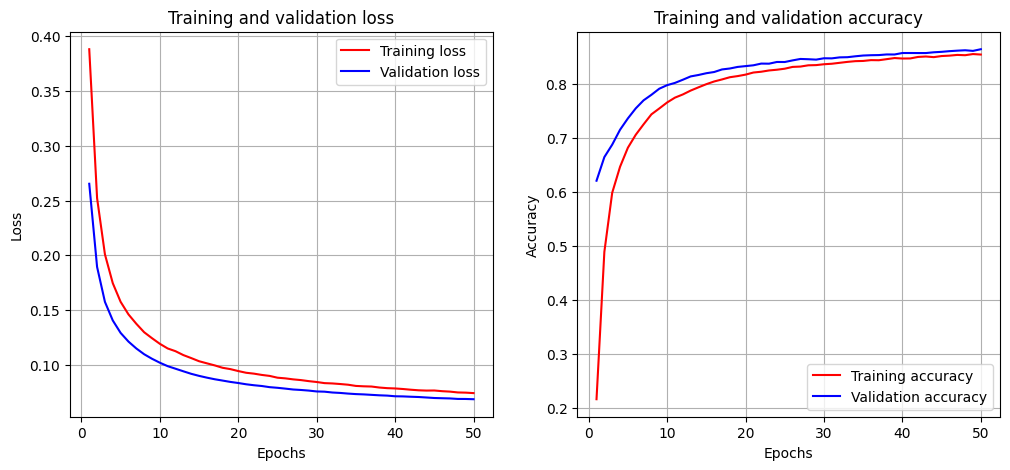

In [29]:

plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(1)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(1)
plt.legend()

plt.show()

In [30]:
with open('history.pkl', 'wb') as f:
    pickle.dump(history.history, f)


In [31]:

with open('history_1.pkl', 'wb') as f:
    pickle.dump(history.history, f)

30 епох батч 512 ReduceLROnPlateau

In [34]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
model_t1= keras.models.load_model("1_model")
history = model_t1.fit(x_train_1, y_train_1,
                       batch_size=512,
                       epochs=30,
                       validation_split=0.2,
                       verbose=1,
                       callbacks=[reduce_lr])


Epoch 1/30
94/94 [==============================] - 2s 18ms/step - loss: 0.3885 - accuracy: 0.2175 - val_loss: 0.2654 - val_accuracy: 0.6085 - lr: 1.0000e-04
Epoch 2/30
94/94 [==============================] - 1s 15ms/step - loss: 0.2515 - accuracy: 0.4919 - val_loss: 0.1892 - val_accuracy: 0.6631 - lr: 1.0000e-04
Epoch 3/30
94/94 [==============================] - 2s 24ms/step - loss: 0.2007 - accuracy: 0.5993 - val_loss: 0.1577 - val_accuracy: 0.6900 - lr: 1.0000e-04
Epoch 4/30
94/94 [==============================] - 2s 17ms/step - loss: 0.1747 - accuracy: 0.6439 - val_loss: 0.1403 - val_accuracy: 0.7168 - lr: 1.0000e-04
Epoch 5/30
94/94 [==============================] - 1s 15ms/step - loss: 0.1575 - accuracy: 0.6814 - val_loss: 0.1288 - val_accuracy: 0.7385 - lr: 1.0000e-04
Epoch 6/30
94/94 [==============================] - 1s 15ms/step - loss: 0.1462 - accuracy: 0.7049 - val_loss: 0.1211 - val_accuracy: 0.7556 - lr: 1.0000e-04
Epoch 7/30
94/94 [==============================] - 

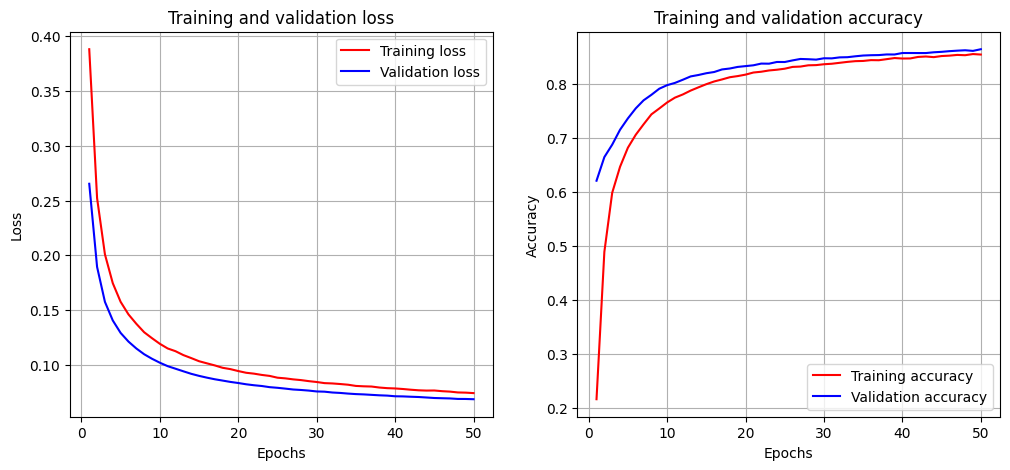

In [35]:

plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(1)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(1)
plt.legend()

plt.show()

# Model_2

 100 епох батч 256 ReduceLROnPlateau

In [36]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)
model_t2= keras.models.load_model("2_model")
history = model_t2.fit(x_train_1, y_train_1,
                       batch_size=256,
                       epochs=100,
                       validation_split=0.2,
                       verbose=1,
                       callbacks=[reduce_lr])


Epoch 1/100
188/188 [==============================] - 6s 22ms/step - loss: 0.2939 - accuracy: 0.4334 - val_loss: 0.1701 - val_accuracy: 0.6607 - lr: 1.0000e-04
Epoch 2/100
188/188 [==============================] - 3s 17ms/step - loss: 0.1575 - accuracy: 0.6677 - val_loss: 0.1269 - val_accuracy: 0.7287 - lr: 1.0000e-04
Epoch 3/100
188/188 [==============================] - 4s 21ms/step - loss: 0.1281 - accuracy: 0.7389 - val_loss: 0.1089 - val_accuracy: 0.7806 - lr: 1.0000e-04
Epoch 4/100
188/188 [==============================] - 3s 19ms/step - loss: 0.1134 - accuracy: 0.7720 - val_loss: 0.0993 - val_accuracy: 0.7977 - lr: 1.0000e-04
Epoch 5/100
188/188 [==============================] - 3s 17ms/step - loss: 0.1038 - accuracy: 0.7936 - val_loss: 0.0924 - val_accuracy: 0.8149 - lr: 1.0000e-04
Epoch 6/100
188/188 [==============================] - 3s 17ms/step - loss: 0.0976 - accuracy: 0.8083 - val_loss: 0.0879 - val_accuracy: 0.8240 - lr: 1.0000e-04
Epoch 7/100
188/188 [=============

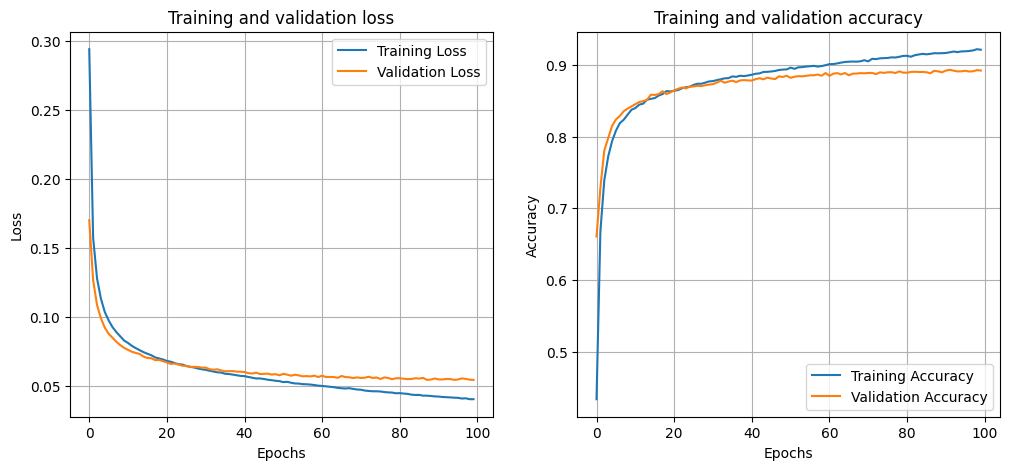

In [37]:
plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(1)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(1)
plt.legend()

plt.show()

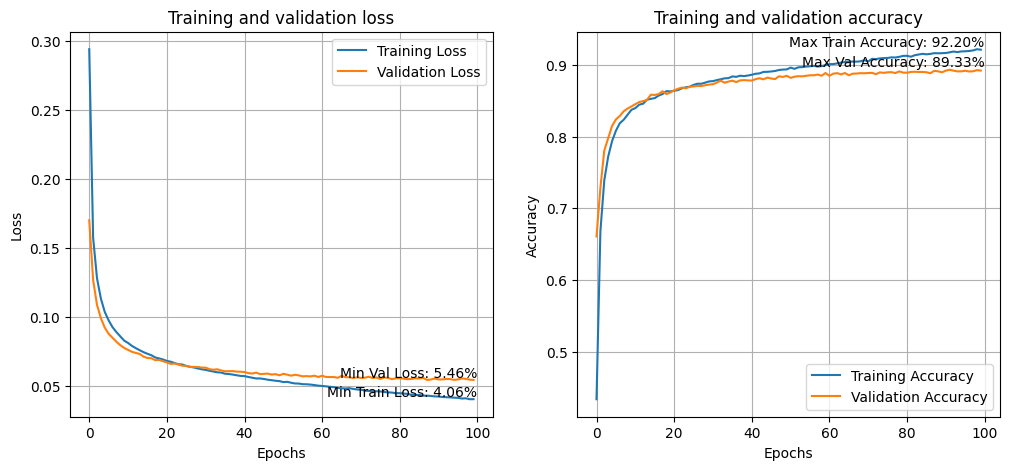

In [38]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.text(len(history.history['loss']), min(history.history['loss']), f'Min Train Loss: {min(history.history["loss"]):.2%}',
         verticalalignment='bottom', horizontalalignment='right')
plt.text(len(history.history['loss']), min(history.history['val_loss']), f'Min Val Loss: {min(history.history["val_loss"]):.2%}',
         verticalalignment='bottom', horizontalalignment='right')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.text(len(history.history['accuracy']), max(history.history['accuracy']), f'Max Train Accuracy: {max(history.history["accuracy"]):.2%}',
         verticalalignment='bottom', horizontalalignment='right')
plt.text(len(history.history['accuracy']), max(history.history['val_accuracy']), f'Max Val Accuracy: {max(history.history["val_accuracy"]):.2%}',
         verticalalignment='bottom', horizontalalignment='right')

plt.show()



# Тестування на моделі 2

In [39]:
y_test_1_categorical = to_categorical(y_test_1)

In [40]:
test_loss_1, test_acc_1 = model_t2.evaluate(x_test_1, y_test_1_categorical)
print('Test accuracy:', test_acc_1)
print('Test loss:', test_loss_1)

313/313 [==============================] - 1s 2ms/step - loss: 0.0585 - accuracy: 0.8880
Test accuracy: 0.8880000114440918
Test loss: 0.05854882299900055


1/1 [==============================] - 0s 111ms/step
[[2.8640237e-14 2.4450944e-10 2.1535603e-11 8.7222146e-10 5.0787201e-11
  2.2903750e-09 1.4851297e-11 1.0000000e+00 5.5846028e-10 1.4875872e-08]]
Предмет що розпізнаний: Sneaker


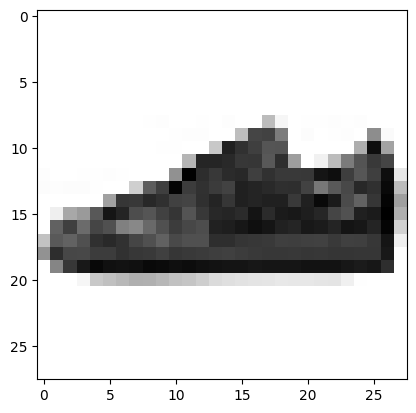

In [41]:
n=22
x=np.expand_dims(x_test_1[n], axis=0)
res = model_t2.predict(x)
print(res)
print(f'Предмет що розпізнаний: {class_names[np.argmax(res)]}')
plt.imshow(x_test_1[n], cmap=plt.cm.binary)
plt.show()

In [42]:
predictions = model_t2.predict(x_train_1)

1875/1875 [==============================] - 4s 2ms/step


In [43]:
predictions[22]

array([1.6002652e-03, 3.0111193e-03, 5.2447364e-02, 1.8965887e-02,
       8.7126058e-01, 3.9280003e-05, 1.9092649e-02, 1.9642830e-04,
       3.3311147e-02, 7.5236108e-05], dtype=float32)

In [44]:
class_names[np.argmax(predictions[22])]

'Coat'

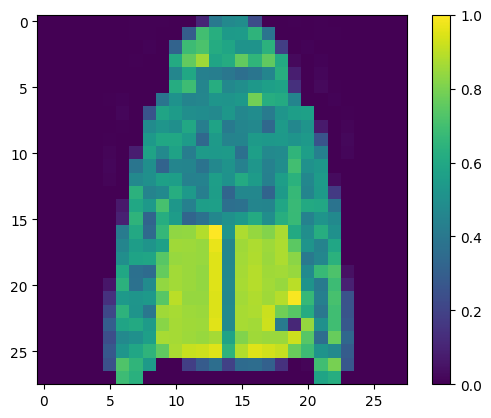

In [46]:
plt.figure()
plt.imshow(x_train_1[22])
plt.colorbar()
plt.grid(False)

In [47]:
class_names[np.argmax(predictions[22])]

'Coat'

In [48]:
predictions_all = model_t2.predict(x_test_1)
predictions_all = np.argmax(predictions_all, axis=1)

predicted_class_names = [class_names[label] for label in predictions_all]
true_class_names = [class_names[label] for label in y_test_1]


313/313 [==============================] - 1s 3ms/step


In [49]:
table_data = []
for i in range(30):
    predicted_class = predicted_class_names[i]
    true_class = true_class_names[i]
    if predicted_class != true_class:
        table_data.append([f"\033[91m{predicted_class}\033[0m", true_class])
    else:
        table_data.append([predicted_class, true_class])

print(tabulate(table_data, headers=["Predicted Class", "True Class"], tablefmt="fancy_grid"))


╒═══════════════════╤══════════════╕
│ Predicted Class   │ True Class   │
╞═══════════════════╪══════════════╡
│ Ankle boot        │ Ankle boot   │
├───────────────────┼──────────────┤
│ Pullover          │ Pullover     │
├───────────────────┼──────────────┤
│ Trouser           │ Trouser      │
├───────────────────┼──────────────┤
│ Trouser           │ Trouser      │
├───────────────────┼──────────────┤
│ Shirt             │ Shirt        │
├───────────────────┼──────────────┤
│ Trouser           │ Trouser      │
├───────────────────┼──────────────┤
│ Coat              │ Coat         │
├───────────────────┼──────────────┤
│ Shirt             │ Shirt        │
├───────────────────┼──────────────┤
│ Sandal            │ Sandal       │
├───────────────────┼──────────────┤
│ Sneaker           │ Sneaker      │
├───────────────────┼──────────────┤
│ Coat              │ Coat         │
├───────────────────┼──────────────┤
│ Sandal            │ Sandal       │
├───────────────────┼──────────────┤
│

In [50]:
mask=predictions_all==y_test_1
print(mask[:30])
x_false=x_test_1[~mask]
y_false=predictions_all[~mask]
print(x_false.shape)

[ True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True False  True  True  True  True  True False
  True False  True  True  True False]
(1120, 28, 28)


In [51]:
print(f'Кількість помилкових значень: {len(x_false)}')


Кількість помилкових значень: 1120


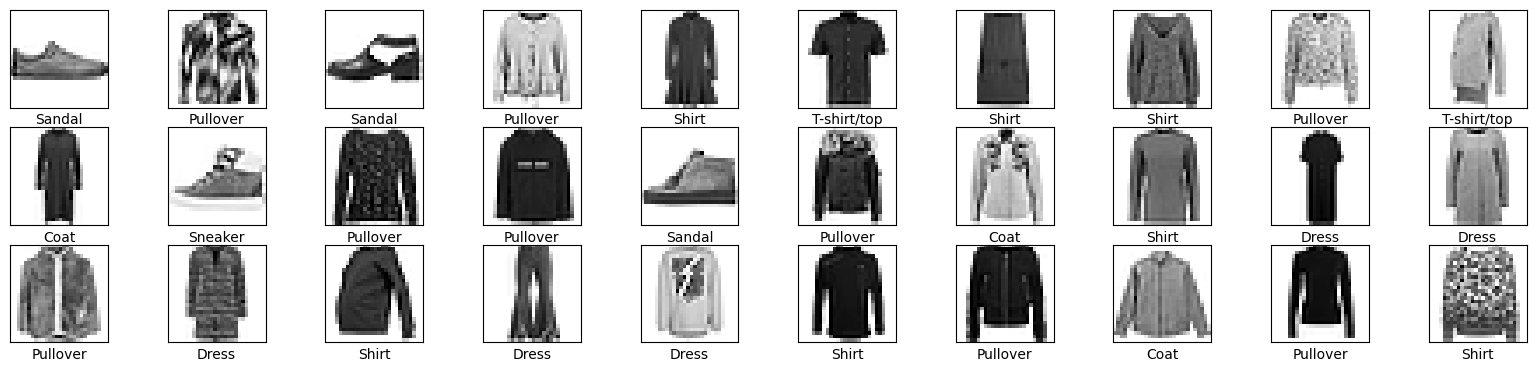

In [52]:
plt.figure(figsize=(20,15))
for i in range(30):
  plt.subplot(10,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_false[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_false[i]])

In [53]:
mask = predictions_all != y_test_1

x_false = x_test_1[mask]
y_false = y_test_1[mask]

false_counts = np.bincount(y_false)

for digit, count in enumerate(false_counts):
    print(f"{class_names[digit]}: {count} помилкових класифікацій")

T-shirt/top: 154 помилкових класифікацій
Trouser: 35 помилкових класифікацій
Pullover: 187 помилкових класифікацій
Dress: 107 помилкових класифікацій
Coat: 188 помилкових класифікацій
Sandal: 39 помилкових класифікацій
Shirt: 292 помилкових класифікацій
Sneaker: 44 помилкових класифікацій
Bag: 30 помилкових класифікацій
Ankle boot: 44 помилкових класифікацій


In [55]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization
[[846   1  16  22   3   1  99   1  11   0]
 [  2 965   1  26   3   0   1   0   2   0]
 [ 12   0 813  14  87   0  71   0   3   0]
 [ 24   4  11 893  33   0  29   0   6   0]
 [  2   0  87  35 812   0  60   0   4   0]
 [  0   0   0   1   0 961   0  23   2  13]
 [118   1  73  25  64   0 708   0  11   0]
 [  0   0   0   0   0  21   0 956   1  22]
 [  2   1   2   6   4   3   8   4 970   0]
 [  0   0   0   0   0   9   1  34   0 956]]


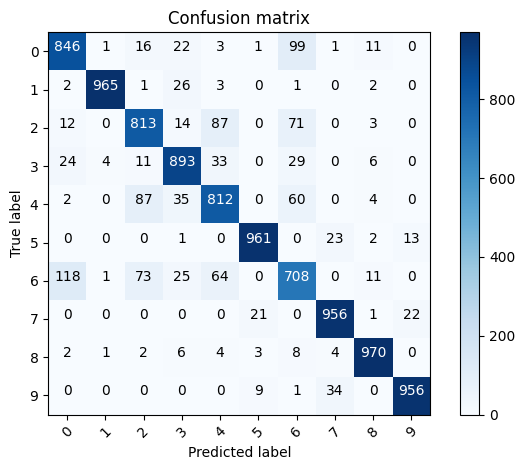

In [56]:
y_pred = np.argmax(model_t2.predict(x_test_1), axis=1)
cm = confusion_matrix(y_test_1, y_pred)
plot_confusion_matrix(cm, classes=range(10))

# Тренування Моделі 3

In [58]:
start_time = time.time()

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)
model_t3= keras.models.load_model("3_model")
history = model_t3.fit(x_train_1, y_train_1,
                       batch_size=256,
                       epochs=50,
                       validation_split=0.2,
                       verbose=1,
                       callbacks=[reduce_lr])

end_time = time.time()
training_time = end_time - start_time
print("Training time: ", training_time, "seconds")



Epoch 1/50
188/188 [==============================] - 12s 56ms/step - loss: 0.2754 - accuracy: 0.4480 - val_loss: 0.1531 - val_accuracy: 0.6826 - lr: 1.0000e-04
Epoch 2/50
188/188 [==============================] - 9s 47ms/step - loss: 0.1450 - accuracy: 0.6898 - val_loss: 0.1215 - val_accuracy: 0.7436 - lr: 1.0000e-04
Epoch 3/50
188/188 [==============================] - 8s 42ms/step - loss: 0.1200 - accuracy: 0.7529 - val_loss: 0.1052 - val_accuracy: 0.7742 - lr: 1.0000e-04
Epoch 4/50
188/188 [==============================] - 9s 47ms/step - loss: 0.1066 - accuracy: 0.7849 - val_loss: 0.0950 - val_accuracy: 0.8101 - lr: 1.0000e-04
Epoch 5/50
188/188 [==============================] - 9s 47ms/step - loss: 0.0982 - accuracy: 0.8035 - val_loss: 0.0891 - val_accuracy: 0.8217 - lr: 1.0000e-04
Epoch 6/50
188/188 [==============================] - 8s 42ms/step - loss: 0.0920 - accuracy: 0.8179 - val_loss: 0.0846 - val_accuracy: 0.8310 - lr: 1.0000e-04
Epoch 7/50
188/188 [===================

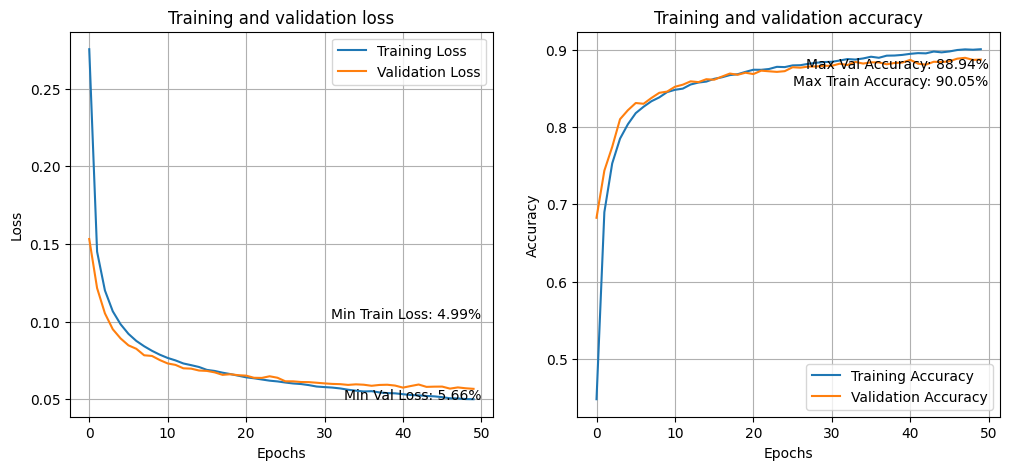

In [59]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.text(len(history.history['loss']), min(history.history['loss']) + 0.05, f'Min Train Loss: {min(history.history["loss"]):.2%}',
         verticalalignment='bottom', horizontalalignment='right')
plt.text(len(history.history['loss']), min(history.history['val_loss']), f'Min Val Loss: {min(history.history["val_loss"]):.2%}',
         verticalalignment='top', horizontalalignment='right')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.text(len(history.history['accuracy']), max(history.history['accuracy']) - 0.05, f'Max Train Accuracy: {max(history.history["accuracy"]):.2%}',
         verticalalignment='bottom', horizontalalignment='right')
plt.text(len(history.history['accuracy']), max(history.history['val_accuracy']), f'Max Val Accuracy: {max(history.history["val_accuracy"]):.2%}',
         verticalalignment='top', horizontalalignment='right')

plt.show()



In [61]:
start_time = time.time()

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)
model_t3= keras.models.load_model("3_model")
history = model_t3.fit(x_train_1, y_train_1,
                       batch_size=256,
                       epochs=100,
                       validation_split=0.2,
                       verbose=1,
                       callbacks=[reduce_lr])

end_time = time.time()
training_time = end_time - start_time
print("Training time: ", training_time, "seconds")


Epoch 1/100
188/188 [==============================] - 14s 67ms/step - loss: 0.2747 - accuracy: 0.4479 - val_loss: 0.1557 - val_accuracy: 0.6601 - lr: 1.0000e-04
Epoch 2/100
188/188 [==============================] - 8s 41ms/step - loss: 0.1447 - accuracy: 0.6892 - val_loss: 0.1190 - val_accuracy: 0.7477 - lr: 1.0000e-04
Epoch 3/100
188/188 [==============================] - 9s 47ms/step - loss: 0.1200 - accuracy: 0.7514 - val_loss: 0.1037 - val_accuracy: 0.7821 - lr: 1.0000e-04
Epoch 4/100
188/188 [==============================] - 9s 47ms/step - loss: 0.1066 - accuracy: 0.7822 - val_loss: 0.0972 - val_accuracy: 0.7974 - lr: 1.0000e-04
Epoch 5/100
188/188 [==============================] - 8s 41ms/step - loss: 0.0981 - accuracy: 0.8043 - val_loss: 0.0882 - val_accuracy: 0.8242 - lr: 1.0000e-04
Epoch 6/100
188/188 [==============================] - 9s 48ms/step - loss: 0.0918 - accuracy: 0.8161 - val_loss: 0.0848 - val_accuracy: 0.8279 - lr: 1.0000e-04
Epoch 7/100
188/188 [============

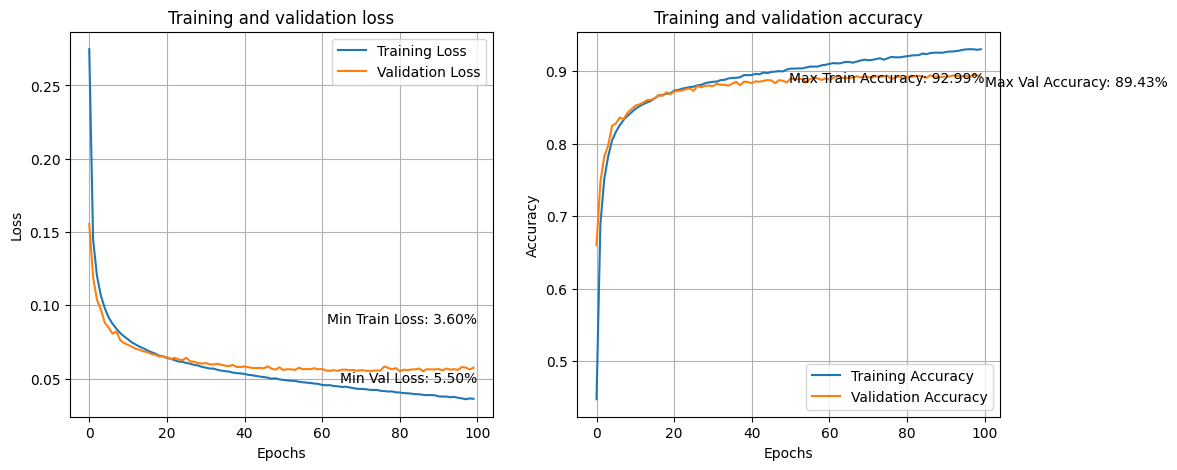

In [62]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.text(len(history.history['loss']), min(history.history['loss']) + 0.05, f'Min Train Loss: {min(history.history["loss"]):.2%}',
         verticalalignment='bottom', horizontalalignment='right')
plt.text(len(history.history['loss']), min(history.history['val_loss']), f'Min Val Loss: {min(history.history["val_loss"]):.2%}',
         verticalalignment='top', horizontalalignment='right')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.text(len(history.history['accuracy']), max(history.history['accuracy']) - 0.05, f'Max Train Accuracy: {max(history.history["accuracy"]):.2%}',
         verticalalignment='bottom', horizontalalignment='right')
plt.text(len(history.history['accuracy']), max(history.history['val_accuracy']), f'Max Val Accuracy: {max(history.history["val_accuracy"]):.2%}',
         verticalalignment='top', horizontalalignment='left')

plt.show()


На тренуванні моделі досягнули точності > 92%, точність валідації 89,43%